### problem Statement : Create a classification model to predict the gender (male or female) based on different acoustic parameters

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
data = pd.read_csv("voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [53]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [54]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [55]:
m,f = 0,0
for i in data['label']:
    if i=='male':
        m+=1
    else:
        f+=1
print('male_count :',m)
print('female_count :',f)

male_count : 1584
female_count : 1584


<AxesSubplot:ylabel='None'>

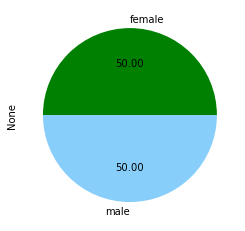

In [56]:
#percentage of label on piechart as (female,male)
data.groupby('label').size().plot(kind='pie',autopct='%.2f',colors=['green','lightskyblue'])

In [57]:
X=data.drop(['label'],axis=1)
y=data['label']

In [58]:
y=y.map({'male':0,'female':1})

### Modelling 

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Decision Tree Classifier

In [61]:
from sklearn import tree
data_model = tree.DecisionTreeClassifier()
data_model.fit(X_train,y_train)
y_data = data_model.predict(X_test)
print(pd.DataFrame(y_data).head())
print("-------------------------------------------------------------")
score = accuracy_score(y_test,y_data)
print("Accuracy score: ",score)
print("\nConfusion Matrix: \n",confusion_matrix(y_test,y_data))
print("\nClassification Report: \n",classification_report(y_test,y_data))

   0
0  1
1  0
2  1
3  1
4  0
-------------------------------------------------------------
Accuracy score:  0.9479495268138801

Confusion Matrix: 
 [[317  16]
 [ 17 284]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       333
           1       0.95      0.94      0.95       301

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_y_data = rfc.predict(X_test)
print(pd.DataFrame(rfc_y_data).head())
print('---------------------------------------------------------------')
score_rfc = accuracy_score(y_test,rfc_y_data)
print("Accuracy score: ",score_rfc)
print("\nConfusion Matrix: \n",confusion_matrix(y_test,rfc_y_data))
print("\nClassification Report: \n",classification_report(y_test,rfc_y_data))

   0
0  1
1  0
2  1
3  1
4  0
---------------------------------------------------------------
Accuracy score:  0.9826498422712934

Confusion Matrix: 
 [[328   5]
 [  6 295]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       333
           1       0.98      0.98      0.98       301

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



###  KNN Classifier

Accuracy , confusion_matrix and classification report

In [63]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
knn_y_data = classifier.predict(X_test)
print(pd.DataFrame(knn_y_data).head())
print("--------------------------------------------------------------------------")
score_knn = accuracy_score(y_test,knn_y_data)
print("Accuracy score: ",score_knn)
print("\nConfusion Matrix: \n",confusion_matrix(y_test,knn_y_data))
print("\nClassification Report: \n",classification_report(y_test,knn_y_data))

   0
0  1
1  0
2  1
3  0
4  0
--------------------------------------------------------------------------
Accuracy score:  0.7413249211356467

Confusion Matrix: 
 [[257  76]
 [ 88 213]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.77      0.76       333
           1       0.74      0.71      0.72       301

    accuracy                           0.74       634
   macro avg       0.74      0.74      0.74       634
weighted avg       0.74      0.74      0.74       634



### Logistic Regression


Accuracy , confusion_matrix and classification report

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lr_y_data = logreg.predict(X_test)
print(pd.DataFrame(lr_y_data).head())
print("--------------------------------------------------------")
score_lr = accuracy_score(y_test,lr_y_data)
print("Accuracy score: ",score_lr)
print("\nConfusion Matrix: \n",confusion_matrix(y_test,lr_y_data))
print("\nClassification Report: \n",classification_report(y_test,lr_y_data))

   0
0  1
1  0
2  1
3  1
4  0
--------------------------------------------------------
Accuracy score:  0.9069400630914827

Confusion Matrix: 
 [[320  13]
 [ 46 255]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       333
           1       0.95      0.85      0.90       301

    accuracy                           0.91       634
   macro avg       0.91      0.90      0.91       634
weighted avg       0.91      0.91      0.91       634



In [65]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_svm = svm_model.predict(X_test)
print(pd.DataFrame(y_svm).head())
print("--------------------------------------------------------")
score_svm = accuracy_score(y_test,y_svm)
print("Accuracy score: ",score_svm)
print("\nConfusion Matrix: \n",confusion_matrix(y_test,y_svm))
print("\nClassification Report: \n",classification_report(y_test,y_svm))

   0
0  0
1  0
2  1
3  0
4  0
--------------------------------------------------------
Accuracy score:  0.6798107255520505

Confusion Matrix: 
 [[260  73]
 [130 171]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.78      0.72       333
           1       0.70      0.57      0.63       301

    accuracy                           0.68       634
   macro avg       0.68      0.67      0.67       634
weighted avg       0.68      0.68      0.68       634

